In [143]:
!pwd

/home/pradyum/Github/Midas_Internship/midas_i_ch/files


In [144]:
## Already in Files Folder
%cd files/

[Errno 2] No such file or directory: 'files/'
/home/pradyum/Github/Midas_Internship/midas_i_ch/files


In [145]:
!ls

hitkul(sample_submission).csv  test_image.pkl	train_label.pkl
testFile.csv		       train_image.pkl


In [146]:
!cat hitkul\(sample_submission\).csv

image_index,class
0,2
1,3
2,0
3,6

In [147]:
import pickle
import numpy as np

In [148]:
!ls

hitkul(sample_submission).csv  test_image.pkl	train_label.pkl
testFile.csv		       train_image.pkl


In [149]:
## for Train Data
pickle_in_train = open("train_image.pkl", "rb")
train_data_pkl = pickle.load(pickle_in_train)
train_data = np.array(train_data_pkl)
print(type(train_data))
# train_data[0]

<class 'numpy.ndarray'>


In [150]:
train_data.shape

(8000, 784)

In [151]:
train_data[0].shape

(784,)

In [152]:
train_data.dtype.name

'int64'

In [153]:
len(train_data)

8000

In [154]:
## for Test Data
pickle_in_test = open("test_image.pkl", "rb")
test_data_pkl = pickle.load(pickle_in_test)
test_data = np.array(test_data_pkl)
print(type(test_data))
# test_data[0]

<class 'numpy.ndarray'>


In [155]:
test_data.shape

(2000, 784)

In [156]:
test_data[0].shape

(784,)

In [157]:
test_data.dtype.name

'int64'

In [158]:
## for Label Data
pickle_in = open("train_label.pkl", "rb")
train_label_pkl = pickle.load(pickle_in)
train_label = np.array(train_label_pkl)
print(type(train_label))
train_label[:]

<class 'numpy.ndarray'>


array([0, 0, 0, ..., 6, 6, 6])

In [159]:
train_label.shape

(8000,)

In [160]:
len(train_data)

8000

In [161]:
len(test_data)

2000

In [162]:
len(train_label)

8000

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test =train_test_split(train_data, train_label, test_size=0.2)

In [165]:
len(X_train)

6400

In [166]:
len(X_test)

1600

In [167]:
len(y_test)

1600

In [168]:
len(y_train)

6400

### Reviewing Data

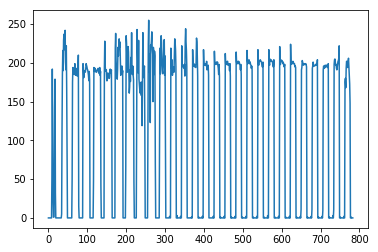

In [169]:
import matplotlib.pyplot as plt
plt.plot(test_data[0])

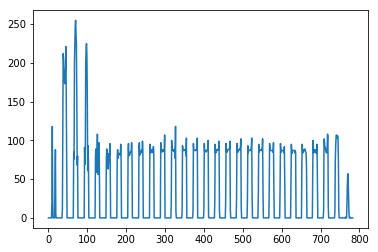

In [170]:
import matplotlib.pyplot as plt
plt.plot(train_data[1])

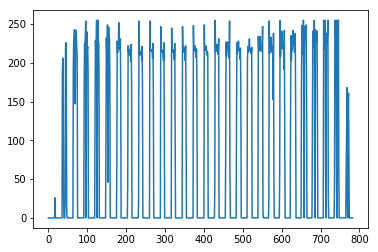

In [171]:
plt.plot(train_data[2])

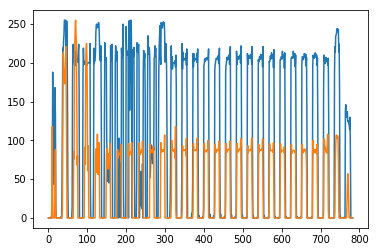

In [172]:
for i in range(2):
    x = plt.plot(train_data[i])

## Logistic Regresstion

In [173]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/home/pradyum/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pradyum/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
logReg_score = model.score(X_test, y_test)

### Decision Tree Classifier

In [ ]:
dx_train, dx_test, dy_train, dy_test =train_test_split(train_data, train_label, test_size=0.2)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(dx_train,dy_train)

In [ ]:
decTree_score = model.score(dx_test, dy_test)

### SVM

In [ ]:
sx_train, sx_test, sy_train, sy_test =train_test_split(train_data, train_label, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(sx_train, sy_train)

In [ ]:
svm_score = model.score(sx_test, sy_test)

### Random Forest

In [ ]:
rx_train, rx_test, ry_train, ry_test =train_test_split(train_data, train_label, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(rx_train, ry_train)

In [ ]:
random_score = model.score(rx_test, ry_test)

##### confusion matrix for Accuracy

##### testing csv submissions

In [ ]:
y_predicted = model.predict(test_data)

In [ ]:
y_predicted

In [ ]:
import pandas as pd
# df = pd.DataFrame(rx_test)
# df 1600x784
df = pd.DataFrame()

In [ ]:
## Image Index
 df['image_index'] = np.array([i for i in range(2000)])

In [ ]:
df['class'] = np.array(y_predicted)

In [ ]:
print(df.head(2001))

In [ ]:
## Conversion to csv
df.to_csv('testFile.csv', sep='\t')

In [ ]:
!ls

In [ ]:
!cat testFile.csv

In [ ]:
# !nautilus .

In [ ]:
## Testing 'No Relevance Delete in final File'
data = np.array([rx_test, y_predicted])
# df['image_index'] = np.array(rx_test)
df['class'] = np.array(y_predicted)
print(df.head(10))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ry_test, y_predicted)
cm

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sn
# plt.figure(figsize=)

## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
kx_train, kx_test, ky_train, ky_test =train_test_split(train_data, train_label, test_size=0.2)

In [ ]:
lr = LogisticRegression()
lr.fit(kx_train, ky_train)

In [ ]:
kfold_score = lr.score(rx_test, ry_test)

### compare Model_predicted accuracy Values

In [ ]:
print("",logReg_score)
print("",decTree_score)
print("",svm_score)
print("",random_score)
print("",kfold_score)